# Machine learning

## Import necessary libs


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import numpy as np 
import matplotlib.pyplot as plt
import re
import pyarabic.araby as ar 
import unicodedata as ud
import string
from sklearn.metrics import classification_report
import pickle

## Reading preprocessed data

In [28]:
df = pd.read_csv('./data/Preprocessed_data.csv')
print("The shape of the dataset is {}.\n\n".format(df.shape))
df

The shape of the dataset is (458197, 4).




,Unnamed: 0,id,text,dialect
0,0,1175358310087892992,لكن بالنهايه ينتفض يغير,IQ
1,1,1175416117793349632,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون...,IQ
2,2,1175450108898565888,مبين من كلامه خليجي,IQ
3,3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,4,1175496913145217024,وين هل الغيبه اخ محمد,IQ
...,...,...,...,...
458192,458192,1019484980282580992,مبسوطين منك اللي باسطانا,BH
458193,458193,1021083283709407232,والله ماينده ابش يختي,BH
458194,458194,1017477537889431552,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بت...,BH
458195,458195,1022430374696239232,الله يبارك فيها وبالعافيه,BH


## Drop extra column

In [29]:
df = df.drop('Unnamed: 0',axis=1)
df

,id,text,dialect
0,1175358310087892992,لكن بالنهايه ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ
...,...,...,...
458192,1019484980282580992,مبسوطين منك اللي باسطانا,BH
458193,1021083283709407232,والله ماينده ابش يختي,BH
458194,1017477537889431552,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بت...,BH
458195,1022430374696239232,الله يبارك فيها وبالعافيه,BH


## Check for NAN values

In [30]:
df.isna().sum()

id         0
text       0
dialect    0
dtype: int64

## Split data 

In [31]:
X = df['text']
y = df['dialect']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Victorize text data and apply TfIdf on it

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

victorizer = CountVectorizer()
X_train = victorizer.fit_transform(X_train)
transformer = TfidfTransformer()
X_train = transformer.fit_transform(X_train)

X_test = victorizer.transform(X_test)
X_test = transformer.transform(X_test)

## Function to get accuarcy

In [33]:
def get_accuracy(trained_model,X, y):
    predicted = trained_model.predict(X)
    accuracy = np.mean(predicted == y)
    return accuracy

# Apply machine learning models

### SGDClassifier

In [34]:
from sklearn.linear_model import SGDClassifier
trained_clf_SGDClassifier = SGDClassifier()
trained_clf_SGDClassifier.fit(X_train, y_train)
accuracy = get_accuracy(trained_clf_SGDClassifier,X_test, y_test)
print(f"Test dataset accuracy with SGDClassifier: {accuracy:.2f}")

Test dataset accuracy with SGDClassifier: 0.50


### LinearSVC

In [35]:
from sklearn.svm import LinearSVC
trained_clf_linearSVC = LinearSVC()
trained_clf_linearSVC.fit(X_train, y_train)
accuracy = get_accuracy(trained_clf_linearSVC, X_test, y_test)
print(f"Test dataset accuracy with LinearSVC: {accuracy:.2f}")

Test dataset accuracy with LinearSVC: 0.54


### MultinomialNB

In [36]:
from sklearn.naive_bayes import MultinomialNB
trained_clf_multinomial_nb = MultinomialNB()
trained_clf_multinomial_nb.fit(X_train, y_train)
accuracy = get_accuracy(trained_clf_multinomial_nb, X_test, y_test)
print(f"Test dataset accuracy with MultinomialNB: {accuracy:.2f}")

Test dataset accuracy with MultinomialNB: 0.40


## LinearSVC is the best model, lets plot confusion matrix with the results

c:\users\its\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


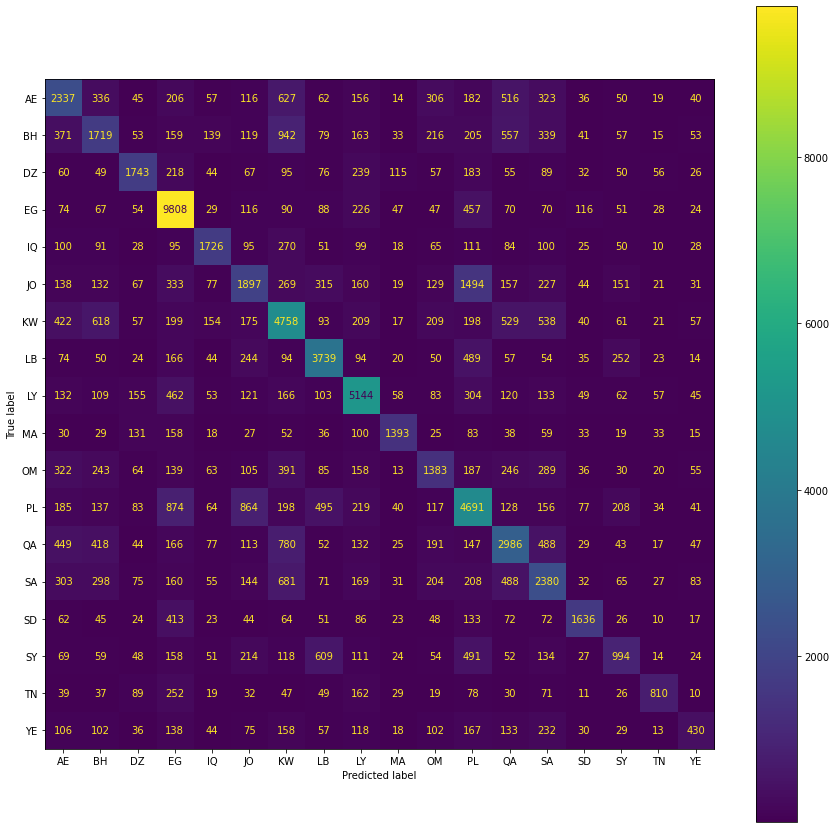

In [37]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(trained_clf_linearSVC, X_test,y_test, ax=ax)

### Classification report

In [38]:
matrix = classification_report(y_test,trained_clf_linearSVC.predict(X_test))
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

          AE       0.44      0.43      0.44      5428
          BH       0.38      0.33      0.35      5260
          DZ       0.62      0.54      0.57      3254
          EG       0.70      0.86      0.77     11462
          IQ       0.63      0.57      0.60      3046
          JO       0.42      0.34      0.37      5661
          KW       0.49      0.57      0.52      8355
          LB       0.61      0.68      0.64      5523
          LY       0.66      0.70      0.68      7356
          MA       0.72      0.61      0.66      2279
          OM       0.42      0.36      0.39      3829
          PL       0.48      0.54      0.51      8611
          QA       0.47      0.48      0.48      6204
          SA       0.41      0.43      0.42      5474
          SD       0.70      0.57      0.63      2849
          SY       0.45      0.31      0.36      3251
          TN       0.66      0.45      0.53      1810
 

## Test LinearSVC model 

In [39]:
t = victorizer.transform(['ازي حالك عامل ايه'])
t = transformer.transform(t)

In [40]:
trained_clf_linearSVC.predict(t)

array(['EG'], dtype=object)

## Save trained model, victorizer, and transformer to use it in deployment

In [14]:
pickle.dump(victorizer, open('./Machine_learning_pickles/victorizer.sav', 'wb'))
pickle.dump(transformer, open('./Machine_learning_pickles/transformer.sav', 'wb'))
pickle.dump(trained_clf_linearSVC, open('./Machine_learning_pickles/linearSVC.sav', 'wb'))

# Deep learning

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import os
from collections import Counter
import logging
import time
import itertools

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import EarlyStopping
 

# Word2vec
import gensim

### parameters

In [3]:
# WORD2VEC 
W2V_SIZE = 300
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 50
BATCH_SIZE = 1024


## Read Data

In [7]:
df = pd.read_csv('./data/Preprocessed_data.csv')
df = df.drop('Unnamed: 0',axis=1).dropna()
df

,id,text,dialect
0,1175358310087892992,لكن بالنهايه ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ
...,...,...,...
458192,1019484980282580992,مبسوطين منك اللي باسطانا,BH
458193,1021083283709407232,والله ماينده ابش يختي,BH
458194,1017477537889431552,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بت...,BH
458195,1022430374696239232,الله يبارك فيها وبالعافيه,BH


## Split data into train and test

In [8]:
df_train, df_test = train_test_split(df, test_size=.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 366557
TEST size: 91640


### List of splitted words

In [9]:
documents = [t.split() for t in df_train.text] 

### Find all words accure more than min count

In [10]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=7, 
                                            min_count= 10, 
                                            workers=4)

In [11]:
w2v_model.build_vocab(documents)

In [12]:
w2v_model.train(documents, total_examples=len(documents), epochs=32)

(123040403, 155796704)

### Define tekonizer for our text data

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 371814


### Pad featuers matrix into len(feat)X300

In [24]:
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text) # replace each word by its token number
                        , maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text) # replace each word by its token number
                       , maxlen=SEQUENCE_LENGTH)

In [58]:
x_test.shape

(91640, 300)

### Encode dialect labels into numbers

In [25]:
encoder = LabelEncoder()
encoder.fit(df_train.dialect.tolist())

y_train = encoder.transform(df_train.dialect.tolist())
y_test = encoder.transform(df_test.dialect.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (366557, 1)
y_test (91640, 1)


In [26]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (366557, 300)
y_train (366557, 1)

x_test (91640, 300)
y_test (91640, 1)


In [13]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(463127, 300)


In [14]:
df.nunique()

id         458023
text       457419
dialect        18
dtype: int64

## Create Deep model using LSTM

In [16]:
model = Sequential()
model.add(Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False))
model.add(Dropout(.2))
model.add(LSTM(300))
model.add(Dropout(.3))
model.add(Dense(18, activation='softmax'))

model.summary()

2022-03-13 03:39:27.105507: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 03:39:27.211267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 03:39:27.212458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 03:39:27.219028: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          138938100 
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 300)               721200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 18)                5418      
Total params: 139,664,718
Trainable params: 726,618
Non-trainable params: 138,938,100
_________________________________________________________________


## Compile the model using adam optimizer 

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## Train the model

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1)

2022-03-13 03:39:30.945330: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-03-13 03:39:33.000881: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


323/323 [==============================] - 88s 263ms/step - loss: 1.8721 - accuracy: 0.4070 - val_loss: 1.6753 - val_accuracy: 0.4667
Epoch 2/50
323/323 [==============================] - 84s 261ms/step - loss: 1.6927 - accuracy: 0.4625 - val_loss: 1.6265 - val_accuracy: 0.4830
Epoch 3/50
323/323 [==============================] - 84s 261ms/step - loss: 1.6422 - accuracy: 0.4780 - val_loss: 1.6062 - val_accuracy: 0.4893
Epoch 4/50
323/323 [==============================] - 84s 261ms/step - loss: 1.6069 - accuracy: 0.4889 - val_loss: 1.5945 - val_accuracy: 0.4935
Epoch 5/50
323/323 [==============================] - 84s 261ms/step - loss: 1.5798 - accuracy: 0.4969 - val_loss: 1.5828 - val_accuracy: 0.4957
Epoch 6/50
323/323 [==============================] - 84s 261ms/step - loss: 1.5562 - accuracy: 0.5048 - val_loss: 1.5780 - val_accuracy: 0.4993
Epoch 7/50
323/323 [==============================] - 84s 261ms/step - loss: 1.5344 - accuracy: 0.5101 - val_loss: 1.5752 - val_accuracy: 0.4

## Save trained model, tokenizer and encoder

In [20]:
model.save('deep_learning/deep_model.h5')
w2v_model.save('deep_learning/word2vec.sav')
pickle.dump(w2v_model, open('deep_learning/w2v.sav', "wb"))
pickle.dump(tokenizer, open('deep_learning/tokenizer.sav', "wb"))
pickle.dump(encoder, open('deep_learning/encoder.sav', "wb"))

## Test the model on test data

In [21]:
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

90/90 [==============================] - 8s 85ms/step - loss: 1.5949 - accuracy: 0.4962

ACCURACY: 0.4962283670902252
LOSS: 1.5949293375015259


## Plot loss and accuarcy curves

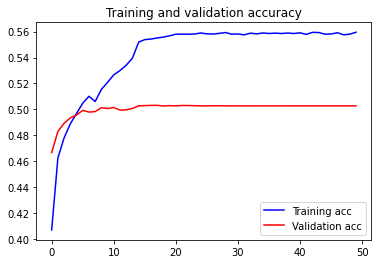

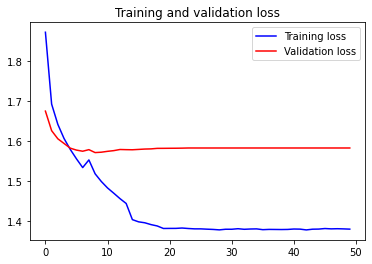

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()